In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
import random

In [2]:
df = pd.read_csv('elonmusk_tweets.csv')

In [3]:
df.head()

,id,created_at,text
0,849636868052275200,2017-04-05 14:56:29,b'And so the robots spared humanity ... https:...
1,848988730585096192,2017-04-03 20:01:01,"b""@ForIn2020 @waltmossberg @mims @defcon_5 Exa..."
2,848943072423497728,2017-04-03 16:59:35,"b'@waltmossberg @mims @defcon_5 Et tu, Walt?'"
3,848935705057280001,2017-04-03 16:30:19,b'Stormy weather in Shortville ...'
4,848416049573658624,2017-04-02 06:05:23,"b""@DaveLeeBBC @verge Coal is dying due to nat ..."


In [4]:
import re

In [5]:
df.text.str.split(pat = "")

0       [, b, ', A, n, d,  , s, o,  , t, h, e,  , r, o...
1       [, b, ", @, F, o, r, I, n, 2, 0, 2, 0,  , @, w...
2       [, b, ', @, w, a, l, t, m, o, s, s, b, e, r, g...
3       [, b, ', S, t, o, r, m, y,  , w, e, a, t, h, e...
4       [, b, ", @, D, a, v, e, L, e, e, B, B, C,  , @...
                              ...                        
2814    [, b, ', T, h, a, t,  , w, a, s,  , a,  , t, o...
2815    [, b, ', G, r, e, a, t,  , V, o, l, t, a, i, r...
2816    [, b, ', I,  , m, a, d, e,  , t, h, e,  , v, o...
2817    [, b, ", W, e, n, t,  , t, o,  , I, c, e, l, a...
2818    [, b, ', P, l, e, a, s, e,  , i, g, n, o, r, e...
Name: text, Length: 2819, dtype: object

In [6]:
text = ""

In [7]:
for data in df.text:
    text = text+" "+data

In [8]:
#text

In [9]:
wlist = re.split("'| |\|;|!|:",text)

In [10]:
wlist

['',
 'b',
 'And',
 'so',
 'the',
 'robots',
 'spared',
 'humanity',
 '...',
 'https',
 '//t.co/v7JUJQWfCv',
 '',
 'b"@ForIn2020',
 '@waltmossberg',
 '@mims',
 '@defcon_5',
 'Exactly.',
 'Tesla',
 'is',
 'absurdly',
 'overvalued',
 'if',
 'based',
 'on',
 'the',
 'past,',
 'but',
 'that',
 's',
 'irr\\xe2\\x80\\xa6',
 'https',
 '//t.co/qQcTqkzgMl"',
 'b',
 '@waltmossberg',
 '@mims',
 '@defcon_5',
 'Et',
 'tu,',
 'Walt?',
 '',
 'b',
 'Stormy',
 'weather',
 'in',
 'Shortville',
 '...',
 '',
 'b"@DaveLeeBBC',
 '@verge',
 'Coal',
 'is',
 'dying',
 'due',
 'to',
 'nat',
 'gas',
 'fracking.',
 'It',
 's',
 'basically',
 'dead."',
 'b"@Lexxxzis',
 'It',
 's',
 'just',
 'a',
 'helicopter',
 'in',
 'helicopter',
 's',
 'clothing"',
 'b"@verge',
 'It',
 'won',
 't',
 'matter"',
 'b',
 '@SuperCoolCube',
 'Pretty',
 'good',
 '',
 'b"Why',
 'did',
 'we',
 'waste',
 'so',
 'much',
 'time',
 'developing',
 'silly',
 'rockets?',
 'Damn',
 'you,',
 'aliens',
 '',
 'So',
 'obtuse',
 '',
 'You',
 'have',

In [11]:
remove_list = []

In [12]:
for word in wlist:
    if len(word)<=1:
        remove_list.append(word)
    #elif len(word)>15:
    #    remove_list.append(word)
    elif word.startswith('http') or word.startswith(' ') or word.startswith('\\') or word.startswith('//') or word.startswith('...'):
        remove_list.append(word)
    else:
        pass

In [13]:
for word in remove_list:
    wlist.remove(word)

In [14]:
wlist

['And',
 'so',
 'the',
 'robots',
 'spared',
 'humanity',
 'b"@ForIn2020',
 '@waltmossberg',
 '@mims',
 '@defcon_5',
 'Exactly.',
 'Tesla',
 'is',
 'absurdly',
 'overvalued',
 'if',
 'based',
 'on',
 'the',
 'past,',
 'but',
 'that',
 'irr\\xe2\\x80\\xa6',
 '@waltmossberg',
 '@mims',
 '@defcon_5',
 'Et',
 'tu,',
 'Walt?',
 'Stormy',
 'weather',
 'in',
 'Shortville',
 'b"@DaveLeeBBC',
 '@verge',
 'Coal',
 'is',
 'dying',
 'due',
 'to',
 'nat',
 'gas',
 'fracking.',
 'It',
 'basically',
 'dead."',
 'b"@Lexxxzis',
 'It',
 'just',
 'helicopter',
 'in',
 'helicopter',
 'clothing"',
 'b"@verge',
 'It',
 'won',
 'matter"',
 '@SuperCoolCube',
 'Pretty',
 'good',
 'b"Why',
 'did',
 'we',
 'waste',
 'so',
 'much',
 'time',
 'developing',
 'silly',
 'rockets?',
 'Damn',
 'you,',
 'aliens',
 'So',
 'obtuse',
 'You',
 'have',
 'all',
 'this',
 'crazy',
 'tech,',
 'but',
 'can',
 'speak',
 'English',
 '?"',
 'Technology',
 'breakthrough',
 'turns',
 'out',
 'chemtrails',
 'are',
 'actually',
 'messa

In [15]:
text2 = ""
for word in wlist:
    text2 = text2+" "+word

In [16]:
text2

' And so the robots spared humanity b"@ForIn2020 @waltmossberg @mims @defcon_5 Exactly. Tesla is absurdly overvalued if based on the past, but that irr\\xe2\\x80\\xa6 @waltmossberg @mims @defcon_5 Et tu, Walt? Stormy weather in Shortville b"@DaveLeeBBC @verge Coal is dying due to nat gas fracking. It basically dead." b"@Lexxxzis It just helicopter in helicopter clothing" b"@verge It won matter" @SuperCoolCube Pretty good b"Why did we waste so much time developing silly rockets? Damn you, aliens So obtuse You have all this crazy tech, but can speak English ?" Technology breakthrough turns out chemtrails are actually message from time-traveling aliens describing the secret of teleportation b"RT @OpenAI We ve created the world first Spam-detecting AI trained entirely in simulation and deployed on physical robot RT @ProfBrianCox This is extremely important from @elonmusk and @SpaceX reusable rockets bring us MUCH closer to becoming spacefaring\\xe2\\x80\\xa6 @adamsbj Def P100D with Ludicro

In [17]:
test = "schedul\\xe2\\x80\\xa6"
test

'schedul\\xe2\\x80\\xa6'

In [18]:
test.replace('[\][\][a-z]','***')

'schedul\\xe2\\x80\\xa6'

In [19]:
stopwords = set(STOPWORDS)

In [20]:
stopwords.add('x80')
stopwords.add('xe2')

In [21]:
stopwords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

In [22]:
def grey_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(0, 0%%, %d%%)" % random.randint(60, 100)

In [23]:
wc_mask = np.array(Image.open('mask1.jpg'))

In [24]:
elon_wc = WordCloud(
    #background_color='white',
    max_words=2000,
    stopwords=stopwords,
    width=800,
    height=800,
    mask=wc_mask,
    #collocations=False,
)

In [25]:
elon_wc.generate(text2)

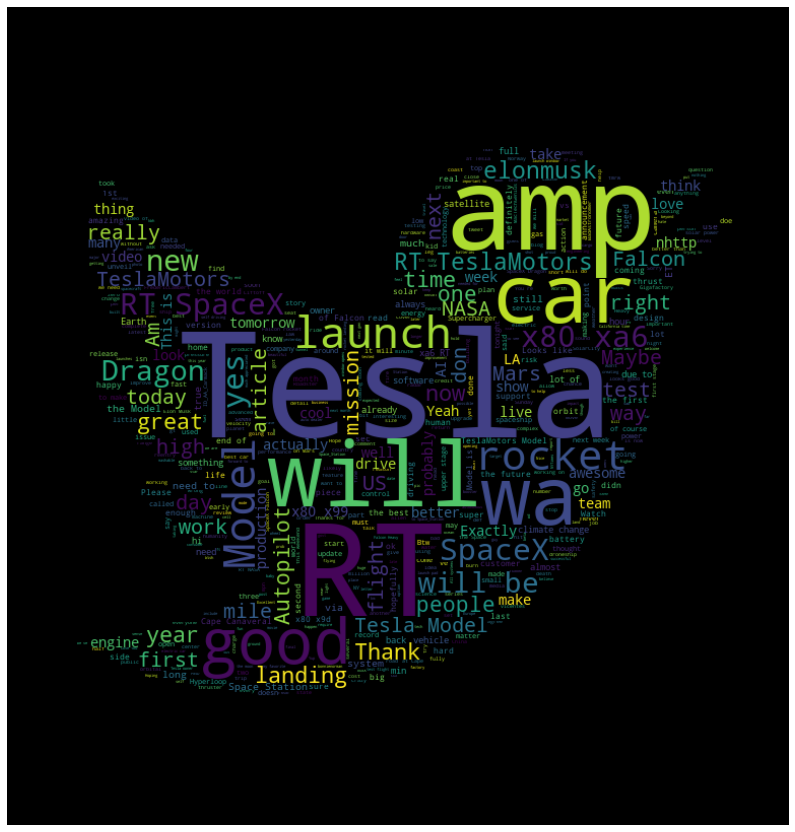

In [26]:
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

plt.imshow(elon_wc, interpolation='bilinear')
plt.axis('off')
plt.savefig('elon_musk_twitter_wordcloud2.png')
plt.show()

In [27]:
wc.recolor(color_func=grey_color_func, random_state=3)

NameError: name 'wc' is not defined